***Pregunta 1***

***Inciso a)***

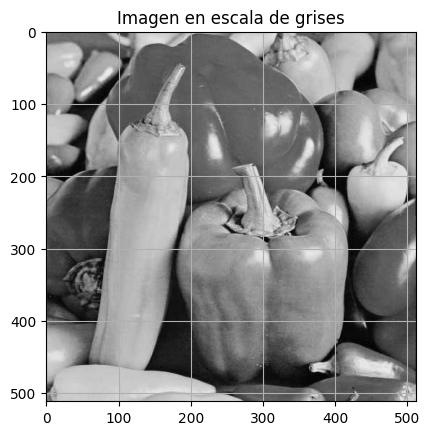

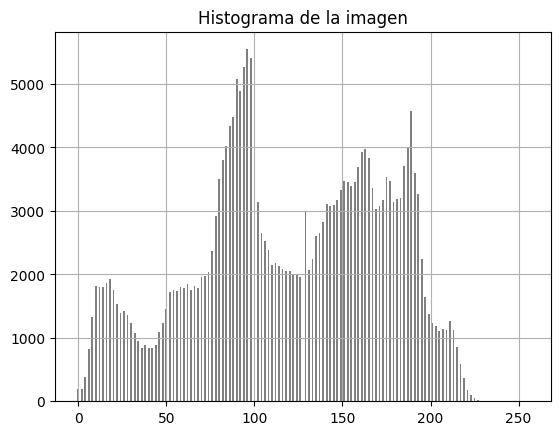

In [6]:
#Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Cargamos la imagen a la variable imagen
imagen = mpimg.imread('peppersgray.png')

#Mostramos la imagen
plt.figure()
plt.title('Imagen en escala de grises')
plt.imshow(imagen, cmap='gray')
plt.grid('on')

#Convertimos la imagen a escala de grises en una escala de 0 a 255
#Logramos esto multiplicando por 255 los valores de los pixeles que se encuentran en el rango [0,1]
for i in range (len(imagen)):
    for j in range (len(imagen[0])):
        imagen[i][j]=imagen[i][j]*255

#Convertimos los valores de la imagen a valores enteros
imagen = imagen.astype(int)

#Convertimos la imagen que es un matriz de dos dimensiones a una dimension (vectorizamos)
imagen_1d = imagen.flatten()

#Graficamos el histograma
plt.figure()
plt.title('Histograma de la imagen')
plt.hist(imagen_1d, bins=256, range=[-0.5, 255.5], color='gray')
plt.grid('on')

Como podemos observar obtenemos el histograma de la imagen que tiene una resolución de 512x512 pixeles , donde cada pixel será un número entre 0 y 255 donde los valores que esten más cercanos a 255 representarán los tonos más oscuros de la imagen y los valores que estén cercanos a 0 aquellos tonos claro llegando a ser casi blancos.

En nuestro histograma podemos observar que no existen muchos pixeles muy oscuros es decir que tengan un valor cercano a 255, por otro lado donde podemos observar que hay una gran cantidad de pixeles es aquellos que tienen un valor menor a 90 es decir que se encuentran casi en el centro no siendo ni tan oscuros ni tan claros.

***Inciso b)***

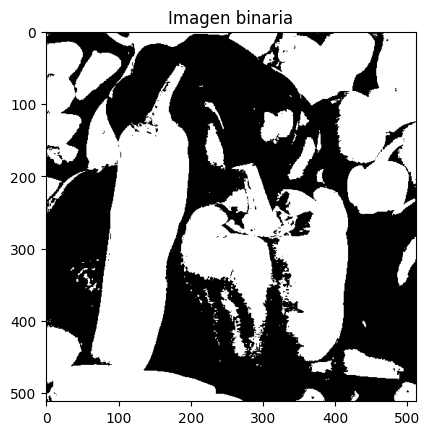

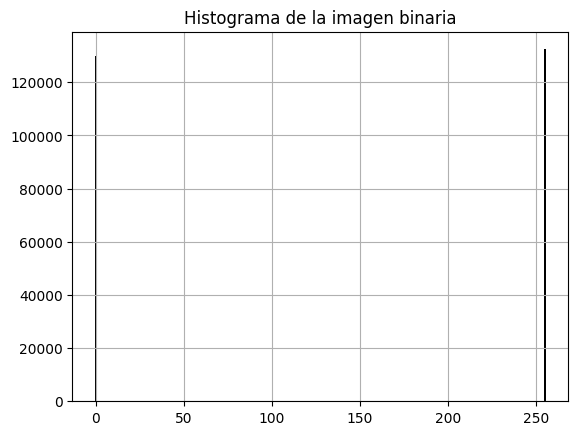

In [10]:
#Definimos el valor umbral
umbral =120

#Convertimos la imagen de escala de grises a una imagen binaria
#Hacemos uso de la función np.where la cual tiene como parametro nuestra matriz
#que contiene los valores de 0 a 255 evalua la condición de imagen<umbral
#si es que se cumple el valor en el indice correspondiente ahora será 0
#sino se cumple condición tomará el valor de 255
imagen_binaria = np.where(imagen< umbral, 0, 255)

#Gráficamos la imagen binaria
plt.figure()
plt.title('Imagen binaria')
plt.imshow(imagen_binaria, cmap='gray')

#Convertimos la imagen que es un matriz de dos dimensiones a una dimension
imagen_binaria_1d = imagen_binaria.flatten()

# Crear el histograma de la imagen binaria
plt.figure()
plt.title('Histograma de la imagen binaria')
plt.hist(imagen_binaria_1d, bins=256, range=[-0.5, 255.5], color='black')
plt.grid('on')


Ahora hemos realizado un pequeño cambio en nuestra imagen, la cual es pasar la imagen de escala de grises a una imagen binaria donde los pixeles solo tendran el valor de 0 y 255 dependiendo de si son mayores o menores al umbral por el cual hemos decidido adoptar, como se mencionó en el enunciado del problema debiamos elegir un umbral para el cual la estructura general de la imagen se conserve, es por ello que elegí el valor de 120 ya que como se observa en el histograma aproximadamente la mitad del número de pixeles tienen un valor de 0 y la otra mitad tienen un valor de 255.

***Inciso c)***

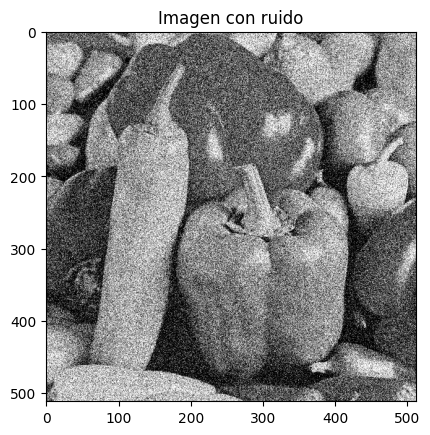

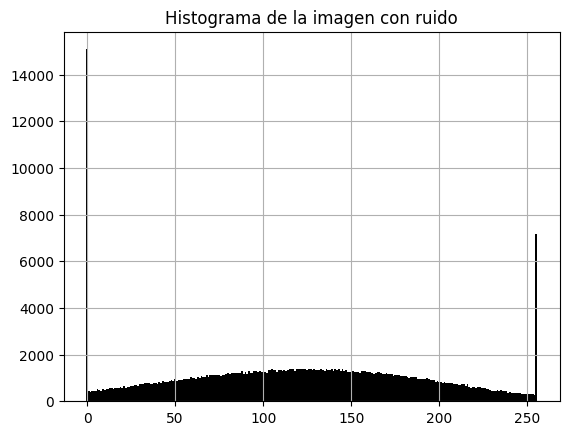

In [13]:
#Definimos la variable ruido_gaussino la cual será la función np.random.normal
#la cual nos genera ruido gaussiano, su primer parametro es la media,el segundo
#la desviación estandar y el ultimo el tamaño del vector de salida

#Función obtenida de la documentación de numpy
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
ruido_gaussiano = np.random.normal(0, 50, imagen.shape)

#Convertimos la imagen de escala de grises a una imagen con ruido gaussiano
imagen_ruido = imagen + ruido_gaussiano

#Después de la suma del ruido debemos asegurarnos que nuestros valores se encuentren
#en el rango de [0-255] ,es por ello que  si existen valores mayores a 255
#los convertiremos a 255 y si existen valores menores a 0 serán iguales a 0
for i in range (len(imagen_ruido)):
    for j in range (len(imagen_ruido[0])):
        if imagen_ruido[i][j]>255:
            imagen_ruido[i][j]=255
        if imagen_ruido[i][j]<0:
            imagen_ruido[i][j]=0

#Convertimos los valores de la imagen con ruido a valores enteros
imagen_ruido = imagen_ruido.astype(int)

#Graficamos la imagen con ruido
plt.figure()
plt.title('Imagen con ruido')
plt.imshow(imagen_ruido, cmap='gray')

#Convertimos la imagen que es un matriz de dos dimensiones a una dimension
imagen_ruido_1d = imagen_ruido.flatten()

# Crear el histograma de la imagen con ruido
plt.figure()
plt.title('Histograma de la imagen con ruido')
plt.hist(imagen_ruido_1d, bins=256, range=[-0.5, 255.5], color='black')
plt.grid('on')


Como podemos observar ahora nuestra imagen se le agregó ruido gaussinao esto se puede notar al mostrar la imagen, una forma de identificar correctamente que tiene ruido es recordar que es lo mismo que sucede cuando tu televisión se quedaba sin cable y aparecian pequeñas manchas oscuras uno a lado de otro, en este caso en nuestro histograma podemos observar que existe una mayor cantidad de pixeles que tomar en el valor de 0 y 255, donde los valores que se encuentran en el intermedio es producto del ruido.

***Pregunta 2)***

***Inciso a)***

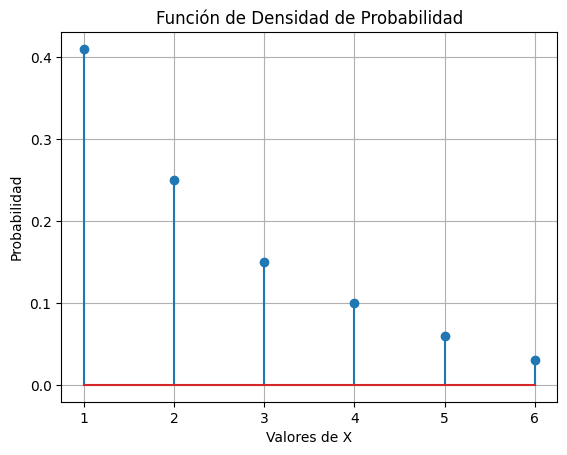

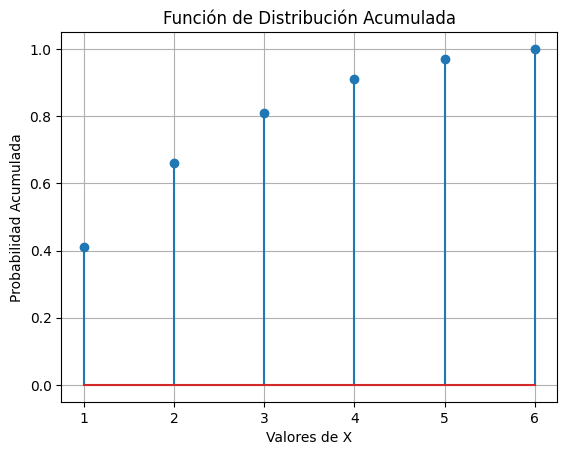

In [14]:
# Definimos un arreglo con los valores posibles de la variable aleatoria X que representa cada una de las caras del dado
x = np.array([1, 2, 3, 4, 5, 6])

# Definimos un arreglo con las probabilidades asociadas a cada valor de X
probabilidad = np.array([0.41, 0.25, 0.15, 0.10, 0.06, 0.03])

#Graficas la función de densidad de probabilidad
plt.figure()
plt.stem(x,probabilidad)
plt.title('Función de Densidad de Probabilidad')
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')
plt.grid('on')

#Definimos la lista que representara nuestra función de distribución acumulada
F=list()
#El primer valor será la probabilidad de indice 0 , luego se irá sumando con
#el valor anterior de la lista
for i in range (len(probabilidad)):
    if i==0:
        F.append(probabilidad[i])
    else:
        F.append(F[i-1]+probabilidad[i])

plt.figure()
plt.stem(x,F)
plt.title('Función de Distribución Acumulada')
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad Acumulada')
plt.grid('on')


***Inciso b***

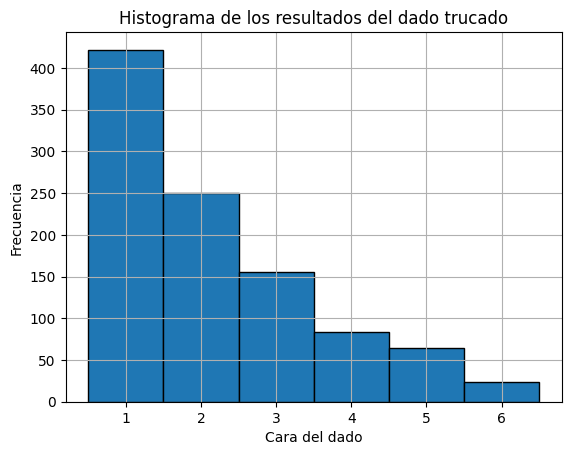

In [17]:
#Definimos el número de veces que vamos a lanzar el dado trucado
num_lanzamientos_dado=1000
#Definimos la variable la cual será el numero random de 0 a 1 con 1000 valores
num_aleatorio=np.random.random(num_lanzamientos_dado)

#Definimos la lista donde vamos a obtener los resultados
resultados=list()
#Vamos a evaluar los 1000 valores que tenemos en num_alteatorio
#si nuestra num_aleatorio es menor o igual a nuestra función de distribución
#acumada en ese indice entonces la probabilidad será el valor de x en dicho indice
for i in range (len(num_aleatorio)):
    for j in range (len(probabilidad)):
        if num_aleatorio[i]<=F[j]:
            resultados.append(x[j])
            break

#Graficamos el histograma con los resultados obtenidops
plt.figure()
plt.hist(resultados, bins=np.arange(x.min(), x.max()+2)-0.5, edgecolor='black', align='mid')
plt.title('Histograma de los resultados del dado trucado')
plt.xlabel('Cara del dado')
plt.ylabel('Frecuencia')
plt.grid('on')
plt.show()

En este caso obtenemos el histograma para los mil lanzamientos de nuestras 6 caras del dado, donde podemos observar que existe una mayor cantidad de veces donde el dado resulta ser la primera cara, esto guarda mucho sentido debido a que en el inciso a. al momento de graficar la función de densidad de probabilidad notamos que la mayor probabilidad de las 6 caras la tiene la cara número 1.De hecho si nos podemos dar cuenta la función de densidad de probabilidad que graficamos previamente tienen un aspecto similar al de nuestro histograma esto se debe a las probabilidades que tiene cada una de nuestras caras de nuestro dado trucado.Para nuestro histograma los valores de frecuencia de cada una de nuestras caras suman 0 , verificando el número de lanzamientos que realizamos.

***Inciso c***

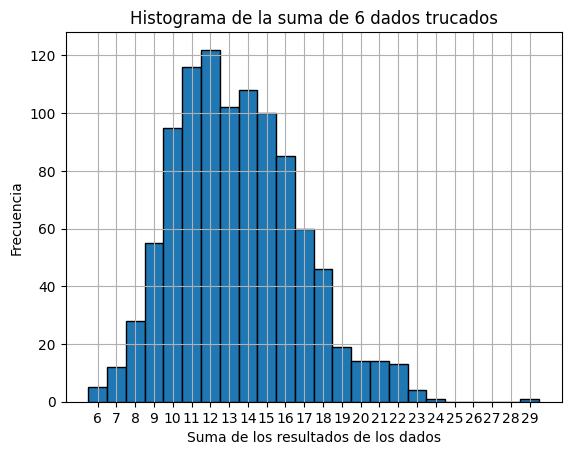

In [18]:
#Definimos el número de dados que vamos a emplear
num_dados=6

#Calculamos los límites de los intervalos para cada valor de X y convertimos la lista a un arreglo en numpy
#para tener una mayor facilidad al trabajar
F_arreglo=np.array(F)

#Definimos la lista de resultados para la suma de los dados
resultados_suma =list()

#Iteraremos entre los 1000 lanzamientos
for _ in range(num_lanzamientos_dado):
    #Inicializamos la variable suma en 0
    suma = 0
    #Iteramos sobre los 6 dados
    for _ in range(num_dados):
        #Generamos un número aleatorio  entre 0 y 1
        r =np.random.random()
        #Definimos la variable dado y calculamos la suma de aquellos elementos en los que se cumpla que
        #r sea mayor a F_arreglo y sumamos 1 para poder obtener los dados del 1 al 6 que representan las caras
        dado = np.sum(r > F_arreglo) + 1
        suma =suma+dado
    resultados_suma.append(suma)

#Convertimos la lista a un arreglo numpy para poder usar los atributos min y max al momento de graficar el histograma
resultados_suma = np.array(resultados_suma)

#Graficamos el histograma
plt.figure()
plt.hist(resultados_suma, bins=np.arange(resultados_suma.min(), resultados_suma.max()+2)-0.5, edgecolor='black', align='mid')
plt.title('Histograma de la suma de 6 dados trucados')
plt.xlabel('Suma de los resultados de los dados')
plt.ylabel('Frecuencia')
plt.xticks(np.arange(resultados_suma.min(), resultados_suma.max()+1))  # Aseguramos que solo se muestren los valores enteros en el eje x
plt.grid('on')
plt.show()

Obtenemos el histograma de la suma de 6 dados independientes donde podemos observar que el mayor valor que podemos tener es de 36 y el menor de 0 es por ello que nuestro eje x se ditribuye en ese rango de valores, la primera observación que podemos notar es que si el número de lanzamientos de dado aumentará es decir el número de experimentos nuestra gráfica del histograma se iria pareciendo cada vez más a la de una distribución gaussiana, se puede realizar este experimento aumentando el valor de num_lanzamientos_dado a 10000 por ejemplo y apreciar el resultado en la gráfica.

***Pregunta 3***

***Pregunta a)***

La media de x1 es: 0.03505457558972398
La media de x2 es: 0.5004338212533168


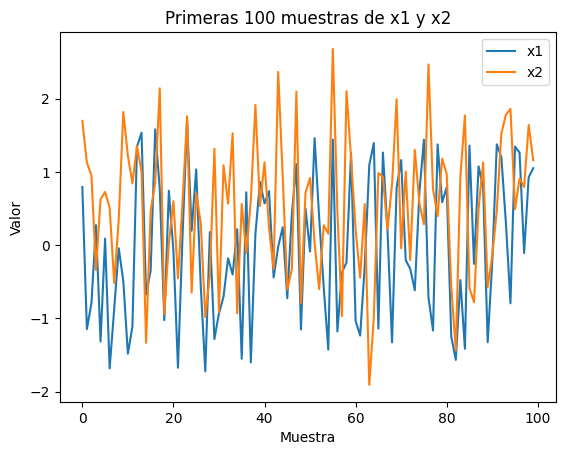

In [23]:
#Abrimos el archivo de texto
with open('x1_x2.txt', 'r') as f:
    #Saltamos la primera línea
    f.readline()
    #Leemos el resto del archivo
    archivo = f.readlines()

#Definimos las listas x1 y x2
x1 =list()
x2 =list()
for linea in archivo:
    #Dividimos la línea en valores
    valores = linea.split()
    #Convertimos los valores a números y los agregamos a las listas correspondientes
    x1.append(float(valores[0]))
    x2.append(float(valores[1]))

#Convertimos las listas a arreglos numpy para facilitar la manipulación
x1 = np.array(x1)
x2 = np.array(x2)
#Calculamos la media de x1
media_x1 = np.mean(x1)
#Calculamos la media de x2
media_x2 = np.mean(x2)

#Imprimimos sus valores de media
print("La media de x1 es:", media_x1)
print("La media de x2 es:", media_x2)

#Graficamos las primeras 100 muestras
plt.figure()
plt.plot(x1[:100], label='x1')
plt.plot(x2[:100], label='x2')
plt.title('Primeras 100 muestras de x1 y x2')
plt.xlabel('Muestra')
plt.ylabel('Valor')
plt.legend()
plt.show()

En este caso estamos tratando con ruido blanco gaussiano, este tipo de ruido es uno especial debido a que es la suma de caracteristicas de ambos tipo de ruido (gaussiano y blanco) , por un lado sigue una distrubución gaussina y por otro tiene una densidad espectral de potencia constante en todo el dominio de las frecuencias.Una forma de comprobar esto es sacarla la media a cada uno de estos ruidos , ya que como sabemos el ruido gaussiano presenta media igual a 0 , es por ellos que verificamos que ambas graficas tienen una media aprox igual a 0.

***Inciso b***

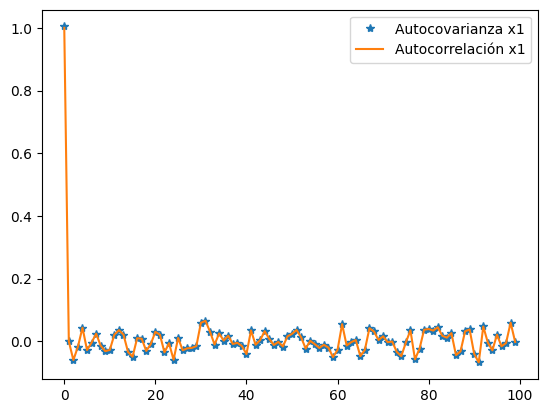

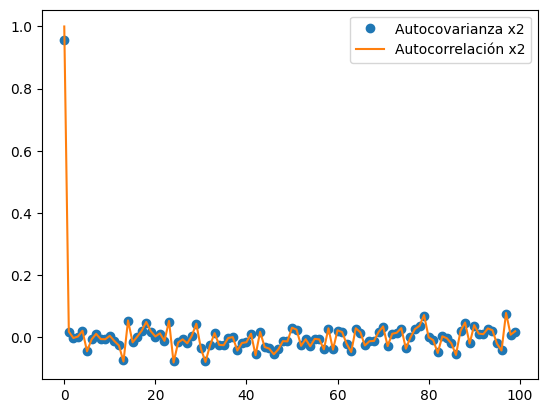

In [28]:
#Definimos la media de x1 y x2
media_x1 = np.mean(x1)
media_x2 = np.mean(x2)

# Calculamos la autocovarianza para x1 y x2 en base a la formula que tenemos en diapositivas
autocov_x1 = np.correlate(x1 - media_x1, x1 - media_x1, mode='full')[len(x1)-1:] / (len(x1)-1)
autocov_x2 = np.correlate(x2 - media_x2, x2 - media_x2, mode='full')[len(x2)-1:] / (len(x2)-1)

#Calculamos la autocorrelación la cual es la autocovarianza normalizada
autocorr_x1 = autocov_x1 / autocov_x1[0]
autocorr_x2 = autocov_x2 / autocov_x2[0]

# Graficamos la autocovarianza y la autocorrelación
plt.figure()
plt.plot(autocov_x1[:100],'*', label='Autocovarianza x1')
plt.plot(autocorr_x1[:100], label='Autocorrelación x1')
plt.legend()

plt.figure()
plt.plot(autocov_x2[:100],'o', label='Autocovarianza x2')
plt.plot(autocorr_x2[:100], label='Autocorrelación x2')
plt.legend()
plt.show()


***Inciso c***

Como podemos observar para los gráficos anteriores las gráficas de autocorrelación como autocovarianza para ambas variables tanto x1 como x2 son iguales,entonces esto quiere decir que tanto x1 y x2 tienen el valor de su varianza igual a 1 , para que la relación de igualdad se pueda cumplir.

***Inciso d***

La varianza experimental de y es: 1.6300776811862214


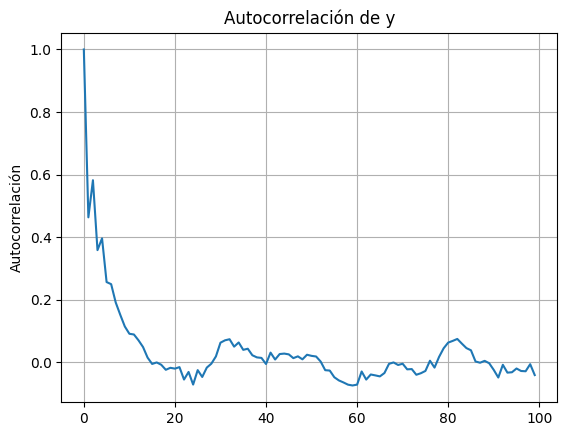

In [30]:
#Inicializamos y[n] con ceros
y = np.zeros_like(x)

# Aplicar el filtro
for n in range(2, len(x)):
    y[n] = 0.25*y[n-1] + 0.5*y[n-2] + x[n]


#Definimos la media de y
media_y = np.mean(y)

#Calcularemos la varianza enter x1 y y de manera experimental
varianza_experimental = np.mean((y - media_y)**2)
print("La varianza experimental de y es:", varianza_experimental)


# Calcular la autocorrelación de y
autocov_y = np.correlate(y - media_y, y - media_y, mode='full')[len(y)-1:] / len(y)
autocorr_y = autocov_y / autocov_y[0]

# Graficar la autocorrelación de y
plt.figure()
plt.plot(autocorr_y[:100])
plt.title('Autocorrelación de y')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()


A partir de la gráfica es que podemos concluir que al inicio es el momento donde ocurre que la autocorrelación tomado su valor máximo.Esto indica una fuerte correlación de la variable y consigo misma, luego podemos notar que tiene un decaimiento en la gráfica , lo que nos indica que ya tiene memoria limitada de sus valores pasados y que se vuelve más dificil de predecir con el pasar el tiempo.

***Inciso e***

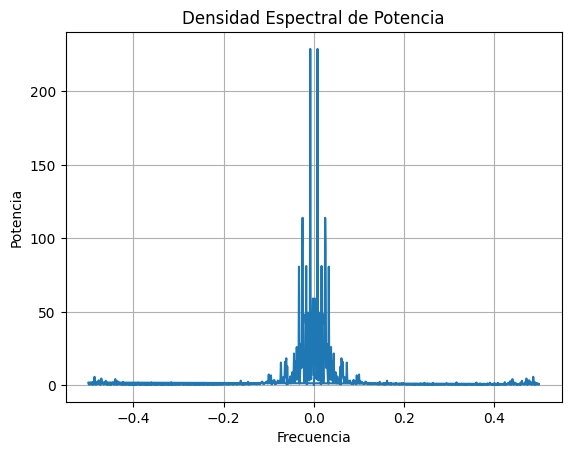

In [37]:
# Calculamos la DTFT de la autocorrelación la cual es igual a la densidad espectral de potencia
densidad_espectral = np.abs(np.fft.fft(autocorr_y))**2

#Creamos un vector de frecuencias
fs = 1  # Frecuencia de muestreo
N = len(autocorr_y)
frecuencia = np.fft.fftfreq(N, 1/fs)

# Graficamos la densidad espectral de potencia
plt.figure()
plt.plot(frecuencia, densidad_espectral)
plt.title('Densidad Espectral de Potencia')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.grid('on')
plt.show()

***Inciso f***

Si se puede considerar a este proceso Moving Average debido a que en las ecuaciones de diferencie el valor de y_n no solo depende de la entrada sino que tambien de valores pasados de y, lo que es una caracteristica fundamental en los procesos ARMA.